# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

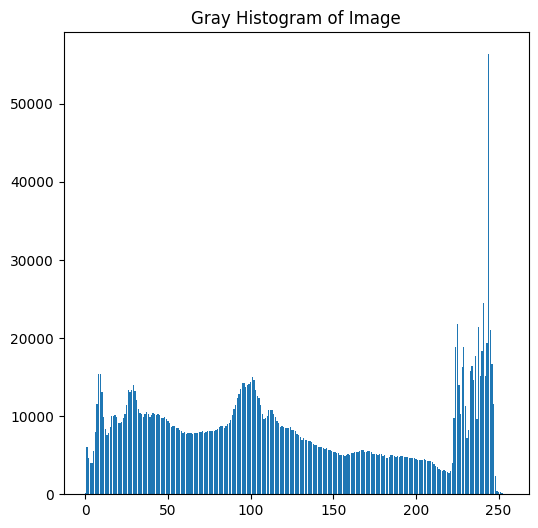

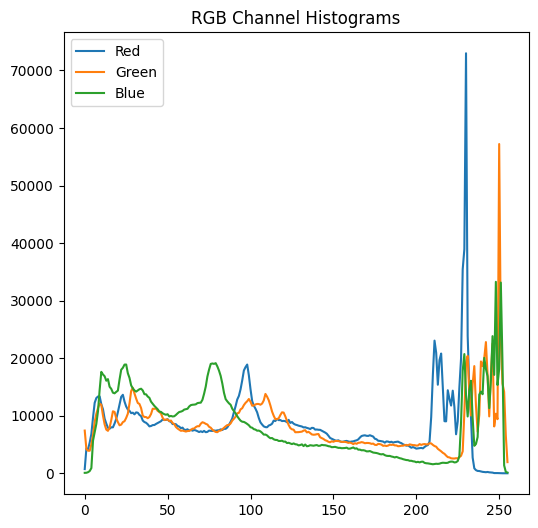

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from jsonschema.benchmarks.const_vs_enum import value
from openpyxl.styles.builtins import title
from scipy.stats import alpha

img = cv.imread('american-sniper.jpg',cv.IMREAD_GRAYSCALE)
def gray_histograms(gray_img):
    myarray = np.zeros(256)
    for i in range(256):
        myarray[i] = np.count_nonzero(gray_img == i)
    return myarray
gray_img = gray_histograms(img)
plt.figure(figsize=(6,6))
plt.title("Gray Histogram of Image")
plt.bar(range(256),gray_img)

rgbimg1 = cv.imread('american-sniper.jpg')
rgbimg = cv.cvtColor(rgbimg1,cv.COLOR_BGR2RGB)
R = rgbimg[:,:,0]
G = rgbimg[:,:,1]
B = rgbimg[:,:,2]

r_array = gray_histograms(R)
g_array = gray_histograms(G)
b_array = gray_histograms(B)

plt.figure(figsize=(6,6))
plt.plot(range(256), r_array, label="Red")
plt.plot(range(256), g_array, label="Green")
plt.plot(range(256), b_array, label="Blue")
plt.title("RGB Channel Histograms")
plt.legend()










-## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

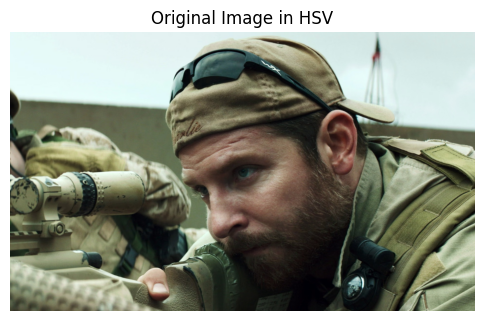

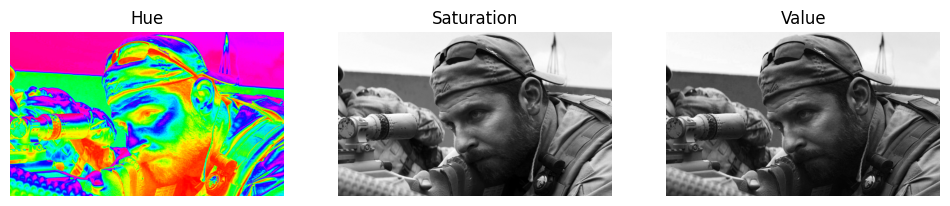

In [3]:
def rgb_to_hsv(some_img):
    some_img = some_img.astype(np.float32)
    some_img = some_img/255.0
    r = some_img[:,:,0]
    g = some_img[:,:,1]
    b = some_img[:,:,2]
    cmax = np.max(some_img, axis=-1)
    cmin = np.min(some_img, axis=-1)
    delta = cmax - cmin
    H = np.zeros_like(cmax)
    S = np.zeros_like(cmax)
    V = cmax.copy()
    nonzero = cmax != 0
    S[nonzero] = delta[nonzero] / cmax[nonzero]
    mask = delta != 0
    mask_r = (cmax == r) & mask
    H[mask_r] = ((g[mask_r] - b[mask_r]) / delta[mask_r]) % 6
    mask_g = (cmax == g) & mask
    H[mask_g] = ((b[mask_g] - r[mask_g]) / delta[mask_g]) + 2
    mask_b = (cmax == b) & mask
    H[mask_b] = ((r[mask_b] - g[mask_b]) / delta[mask_b]) + 4
    H = H * 60.0  # to degrees

    H2 = (H / 2).astype(np.uint8)
    S2 = (S * 255).astype(np.uint8)
    V2 = (V * 255).astype(np.uint8)
    hsv_denorm = np.stack([H2, S2, V2], axis=-1)

    return hsv_denorm

img_newA = rgb_to_hsv(rgbimg)
img_newB = cv.cvtColor(img_newA,cv.COLOR_HSV2BGR)
img_new = cv.cvtColor(img_newB,cv.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_new)
plt.axis("off")
plt.title("Original Image in HSV")
plt.show()

H = img_new[:, :, 0]
S = img_new[:, :, 1]
V = img_new[:, :, 2]

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Hue")
plt.imshow(H/179, cmap="hsv")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Saturation")
plt.imshow(S, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Value")
plt.imshow(V, cmap="gray")
plt.axis("off")

plt.show()

hsv = rgb_to_hsv(rgbimg)






    -## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

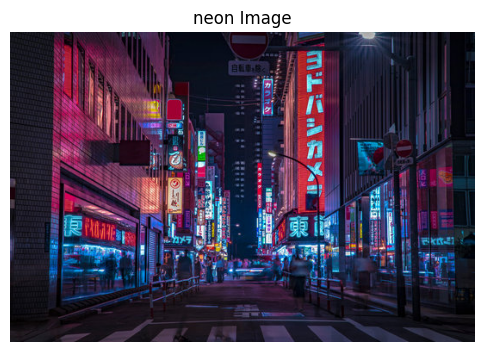

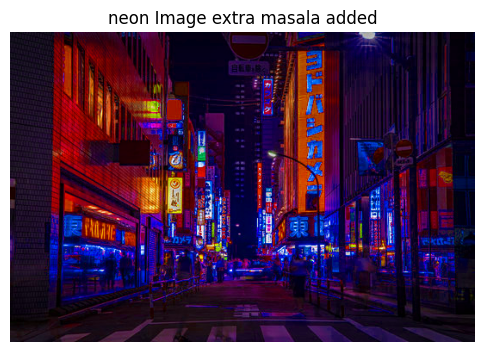

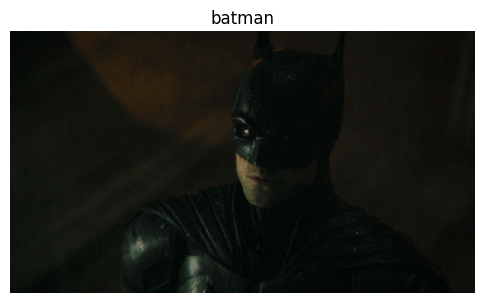

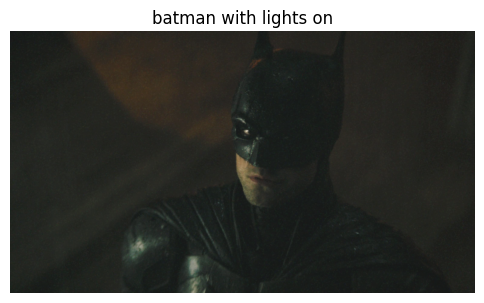

In [4]:
# Saturation and hue, for giving characterisitc touch to neon light images
def neongobrr(img_rgb,scale=2,angle=30):
    hsv = rgb_to_hsv(img_rgb).astype(np.float32)
    hsv[...,1] = np.clip(hsv[...,1] * scale,0,255)
    shift = angle*179//360
    hsv[:,:,0] = (hsv[:,:,0] + shift) % 180
    saturated =  cv.cvtColor(hsv.astype(np.uint8),cv.COLOR_HSV2RGB)
    return saturated
newimg = cv.imread("japan.jpg")
newimg = cv.cvtColor(newimg,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(newimg)
# plt.imshow(rgbimg)
plt.axis("off")
plt.title("neon Image")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(neongobrr(newimg))
# plt.imshow(rgbimg)
plt.axis("off")
plt.title("neon Image extra masala added")
plt.show()

# birghtness and gamma for dark images
def let_there_be_light(img_rgb,beta=40,alpha=1.05,gamma=0.75):
    bright = cv.convertScaleAbs(img_rgb, alpha=float(alpha), beta=float(beta))
    inv = 1.0/gamma
    table = np.array([(i/255)**inv*255 for i in range(256)]).astype(np.uint8)
    gamma_corrected = cv.LUT(bright, table)
    return gamma_corrected
newimg1 = cv.imread("batman.jpg")
newimg1 = cv.cvtColor(newimg1,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(newimg1)
plt.axis("off")
plt.title("batman")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(let_there_be_light(newimg1))
plt.axis("off")
plt.title("batman with lights on")
plt.show()






## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

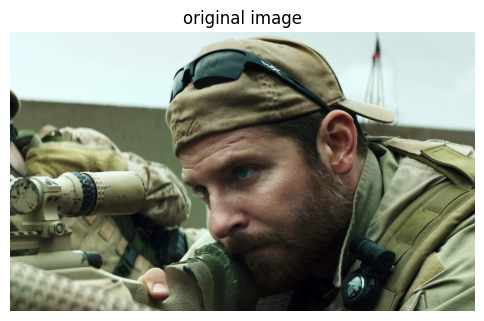

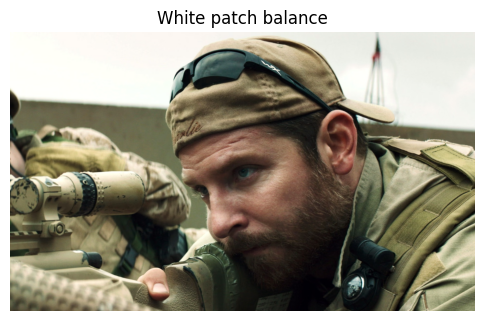

In [5]:
def white_patch_balance(img_rgb):
    img_rgb = img_rgb.astype(np.float32)
    r = img_rgb[:,:,0]
    g = img_rgb[:,:,1]
    b = img_rgb[:,:,2]

    V = np.max(img_rgb, axis=-1)
    idx = np.unravel_index(V.argmax(), V.shape)
    brightest_pixel = img_rgb[idx]

    r_white, g_white, b_white = brightest_pixel

    scale_r = 255/r_white
    scale_g = 255/g_white
    scale_b = 255/b_white

    r  *= scale_r
    g *= scale_g
    b *= scale_b

    img = np.clip(img_rgb, 0, 255).astype(np.uint8)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("White patch balance")
    plt.show()



imgnew = cv.imread("american-sniper.jpg")
imgnew = cv.cvtColor(imgnew,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(imgnew)
plt.axis("off")
plt.title("original image")
plt.show()

white_patch_balance(rgbimg)




|## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

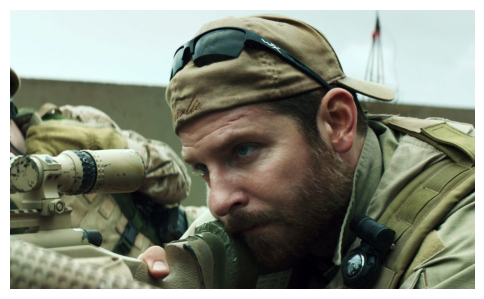

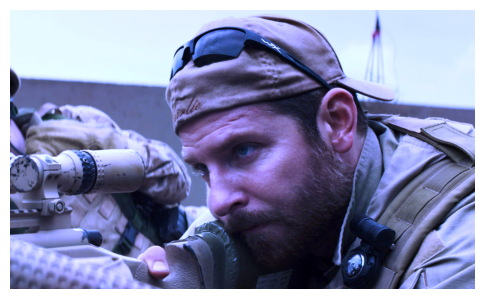

In [6]:
def white_balance(img_rgb, value):
    img_rgb = img_rgb.astype(np.float32)
    r = img_rgb[:,:,0]
    g = img_rgb[:,:,1]
    b = img_rgb[:,:,2]

    V = np.max(img_rgb, axis=-1)
    idx = np.unravel_index(V.argmax(), V.shape)
    brightest_pixel = img_rgb[idx]

    r_white, g_white, b_white = brightest_pixel

    scale_r = 255/r_white
    scale_g = 255/g_white
    scale_b = 255/b_white
    if value == 0:
        b *= scale_b*2.05
        imgnew = np.clip(img_rgb, 0, 255).astype(np.uint8)
        plt.figure(figsize=(6,6))
        plt.imshow(imgnew)
        plt.axis("off")
        plt.show()
    elif value ==1 :
        r *= scale_r*1.75
        g *= scale_g*1.05
        b *= scale_b*0.75
        imgnew = np.clip(img_rgb, 0, 255).astype(np.uint8)
        plt.figure(figsize=(6,6))
        plt.imshow(imgnew)
        plt.axis("off")
        plt.show()
    elif value == 0.5:
        imgnew = np.clip(img_rgb, 0, 255).astype(np.uint8)
        plt.figure(figsize=(6,6))
        plt.imshow(imgnew)
        plt.axis("off")
        plt.show()

value = float(input("enter value :" ))
plt.figure(figsize=(6,6))
plt.imshow(imgnew)
plt.axis("off")
plt.show()
white_balance(rgbimg, value)

In [12]:
# I knew to make warm the reds and greens should be greater than blues and vice versa
# for cold , but the values that I am using are hit and try.